In [3]:
# Dependencies
import pandas as pd
import os
import requests
import numpy as np
from matplotlib import pyplot as plt
import json
import csv

In [91]:
# Import CSVs (2015)

player_data_15 = pd.read_csv("2015.csv")

player_data_15.columns


Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [95]:
# Import CSVs (2016)

player_data_16 = pd.read_csv("2016.csv")

player_data_16.columns


Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [94]:
# Import CSVs (2017)

player_data_17 = pd.read_csv("2017.csv")

player_data_17.columns


Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [93]:
# Import CSVs 2018

player_data_18 = pd.read_csv("2018.csv")

player_data.columns


Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [92]:
# Import CSVs

player_data_19 = pd.read_csv("2019.csv")

player_data_19.columns


Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [116]:
# Assemble new dataframes of runningbacks / Set Index to Positions / Set by year 
# Don't have to print all of them, just to show. 

#2019

data_pos_19 = player_data_19.set_index(["Pos"])

skill_data_19 = data_pos_19.drop(['QB','0','WR','TE'])

# 2018

data_pos_18 = player_data_18.set_index(["Pos"])

skill_data_18 = data_pos_18.drop(['QB','0','WR','TE'])

#2017

data_pos_17 = player_data_17.set_index(["Pos"])

skill_data_17 = data_pos_17.drop(['QB','0','WR','TE'])

#2016

data_pos_16 = player_data_16.set_index(["Pos"])

skill_data_16 = data_pos_16.drop(['QB','0','WR','TE'])

#2015

data_pos_15 = player_data_15.set_index(["Pos"])

skill_data_15 = data_pos_15.drop(['QB','0','WR','TE'])

skill_data_15.head(1)

,Unnamed: 0,Player,Tm,Age,G,GS,Cmp,Att,Yds,Int,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
Pos,,,,,,,,,,,,,,,,,,,,,
RB,1,Devonta Freeman,ATL,23.0,15.0,13.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1056.0,11.0,265.0,578.0,3.0,316.4


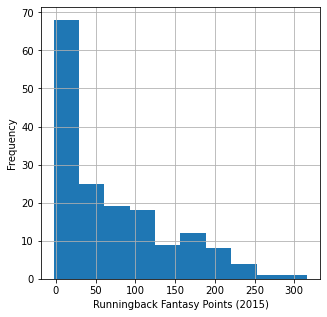

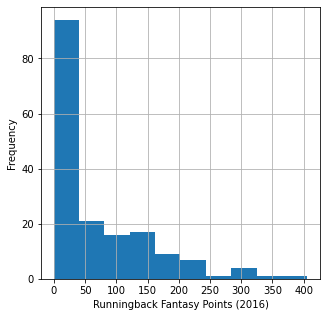

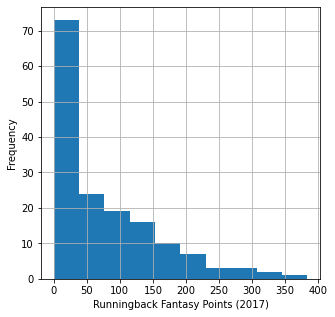

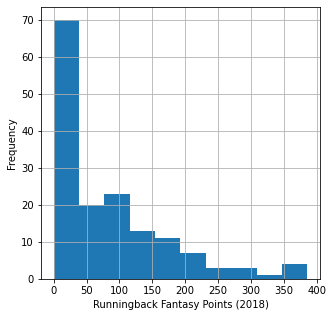

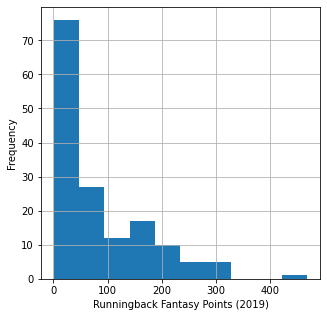

In [234]:
# find histogram 

# set columns 

fantasypoints_19 = skill_data_19["FantasyPoints"]

fantasypoints_18 = skill_data_18["FantasyPoints"]

fantasypoints_17 = skill_data_17["FantasyPoints"]

fantasypoints_16 = skill_data_16["FantasyPoints"]

fantasypoints_15 = skill_data_15["FantasyPoints"]

recs_15 = skill_data_15["Rec"]

recs_16 = skill_data_16["Rec"]

recs_17 = skill_data_17["Rec"]

recs_18 = skill_data_18["Rec"]

recs_19 = skill_data_19["Rec"]

# Label Years // Try to Soften Colors

# 2015 
plt.figure(figsize=(5,5))
fantasypoints_15.hist()
plt.xlabel("Runningback Fantasy Points (2015)")
plt.ylabel("Frequency")

#2016

plt.figure(figsize=(5,5))
fantasypoints_16.hist()
plt.xlabel("Runningback Fantasy Points (2016)")
plt.ylabel("Frequency")

#2017

plt.figure(figsize=(5,5))
fantasypoints_17.hist()
plt.xlabel("Runningback Fantasy Points (2017)")
plt.ylabel("Frequency")

#2018 
plt.figure(figsize=(5,5))
fantasypoints_18.hist()
plt.xlabel("Runningback Fantasy Points (2018)")
plt.ylabel("Frequency")

#2019
plt.figure(figsize=(5,5))
fantasypoints_19.hist()
plt.xlabel("Runningback Fantasy Points (2019)")
plt.ylabel("Frequency")
plt.show()

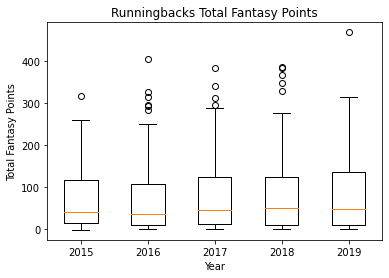

In [235]:
# Plot Box Plot
box_labels = ['2015','2016','2017','2018','2019']
pts_boxes = [fantasypoints_15,fantasypoints_16,fantasypoints_17,fantasypoints_18,fantasypoints_19]
plt.ylabel("Total Fantasy Points")
plt.xlabel("Year")
plt.title("Runningbacks Total Fantasy Points")

plot_1 = plt.boxplot(pts_boxes, labels=box_labels)


plt.show()
        

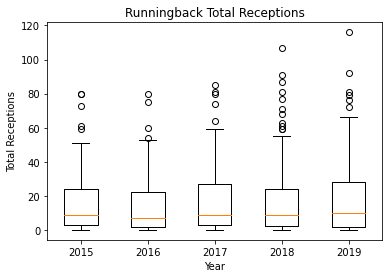

In [236]:
recs_boxes = [recs_15,recs_16,recs_17,recs_18,recs_19]
plt.xlabel("Year")
plt.ylabel("Total Receptions")
plt.title("Runningback Total Receptions")

plot_2 = plt.boxplot(recs_boxes, labels=box_labels)

In [124]:
desc_fantpts_19 = skill_data_19.describe()["FantasyPoints"]
desc_fantpts_19

count    153.000000
mean      79.707712
std       88.202045
min        0.300000
25%        9.800000
50%       48.200000
75%      135.400000
max      469.200000
Name: FantasyPoints, dtype: float64

In [129]:
desc_fantpts_18 = skill_data_18.describe()["FantasyPoints"]
desc_fantpts_18

count    155.000000
mean      79.670968
std       88.505393
min       -0.100000
25%        8.300000
50%       49.700000
75%      123.800000
max      385.500000
Name: FantasyPoints, dtype: float64

In [130]:
desc_fantpts_17 = skill_data_17.describe()["FantasyPoints"]
desc_fantpts_17

count    158.000000
mean      75.650886
std       80.852657
min       -0.200000
25%       11.000000
50%       45.800000
75%      123.400000
max      383.300000
Name: FantasyPoints, dtype: float64

In [131]:
# find q's 16

desc_fantpts_16 = skill_data_16.describe()["FantasyPoints"]
desc_fantpts_16

count    171.000000
mean      69.312281
std       81.040511
min       -0.400000
25%        8.000000
50%       35.300000
75%      107.000000
max      405.800000
Name: FantasyPoints, dtype: float64

In [132]:
# Find quartiles for '15'

desc_fantpts_15 = skill_data_15.describe()["FantasyPoints"]
desc_fantpts_15

count    165.000000
mean      70.762061
std       70.723497
min       -2.800000
25%       12.700000
50%       40.700000
75%      117.000000
max      316.400000
Name: FantasyPoints, dtype: float64

In [149]:
# Establishe top quartile per year

top_q_scorers_15 = skill_data_15[skill_data_15["FantasyPoints"].ge(117)]

top_q_scorers_16 = skill_data_16[skill_data_16["FantasyPoints"].ge(107)]

top_q_scorers_17 = skill_data_17[skill_data_17["FantasyPoints"].ge(123.4)]

top_q_scorers_18 =skill_data_18[skill_data_18["FantasyPoints"].ge(123.8)]

top_q_scorers_19 = skill_data[skill_data["FantasyPoints"].ge(136.4)]

# Build Columns of Rushing/Receiving Yds per Year, then Put into DF

# 2019

tq_rushyds_19 = top_q_scorers_19["RushingYds"]

tq_recyds_19 = top_q_scorers_19["ReceivingYds"]

tq_totalyds_19 = tq_rushyds_19 + tq_recyds_19


#2018

tq_rushyds_18 = top_q_scorers_18["RushingYds"]

tq_recyds_18 = top_q_scorers_18["ReceivingYds"]

tq_totalyds_18 = tq_rushyds_18 + tq_recyds_18


#2017

tq_rushyds_17 = top_q_scorers_17["RushingYds"]

tq_recyds_17 = top_q_scorers_17["ReceivingYds"]

tq_totalyds_17 = tq_rushyds_17 + tq_recyds_17


#2016

tq_rushyds_16 = top_q_scorers_16["RushingYds"]

tq_recyds_16 = top_q_scorers_16["ReceivingYds"]

tq_totalyds_16 = tq_rushyds_16 + tq_recyds_16


#2015

tq_rushyds_15 = top_q_scorers_15["RushingYds"]

tq_recyds_15 = top_q_scorers_15["ReceivingYds"]

tq_totalyds_15 = tq_rushyds_15 + tq_recyds_15

#big_df = pd.DataFrame({
    
 #   "'15 Rushing Yds'": tq_rushyds_15,
  #  "'15 Receiving Yds'": tq_rushyds_15,
   # "'15 Total Yds'": tq_totalyds_15,
   # "'16 Rushing Yds'": tq_rushyds_16,
   # "'16 Receiving Yds'": tq_recyds_16,
   # "'16 Total Yds'": tq_totalyds_16,
   # "'17 Rushing Yds'": tq_rushyds_17,
   # "'17 Receiving Yds'": tq_recyds_17,
   # "'17 Total Yds'": tq_totalyds_17,
   # "'18 Rushing Yds'": tq_rushyds_18,
   # "'18 Receiving Yds'": tq_recyds_18,
   # "'18 Total Yds'": tq_totalyds_18,
   # "'19 Rushing Yds'": tq_rushyds_19,
   # "'19 Receiving Yds'": tq_recyds_19,
   # "'19 Total Yds'": tq_totalyds_19})



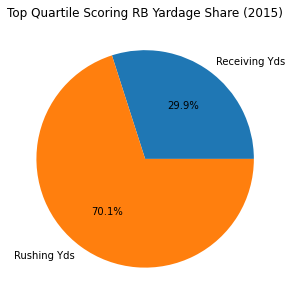

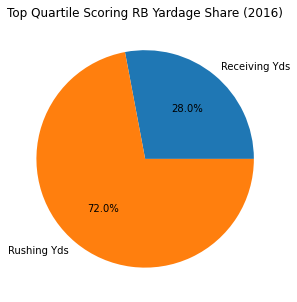

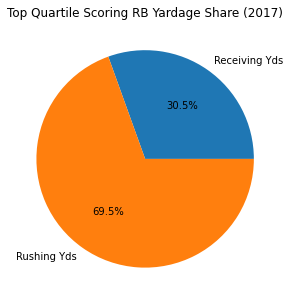

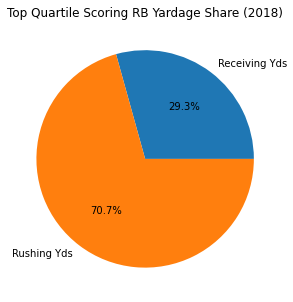

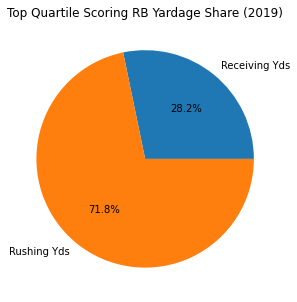

In [241]:
# plot the pie charts -- TOP QUARTILE

labels = ["Receiving Yds","Rushing Yds"]

# 2015

sum_15_rushing = tq_rushyds_15.sum()

sum_15_receiving = tq_recyds_15.sum()

sizes_15 = [sum_15_receiving,sum_15_rushing]

plt.figure(figsize=(5,5))

plt.pie(sizes_15,labels=labels,autopct='%1.1f%%')

plt.title("Top Quartile Scoring RB Yardage Share (2015)")

# 2016

sum_16_rushing = tq_rushyds_16.sum()

sum_16_receiving = tq_recyds_16.sum()

sizes_16 = [sum_16_receiving,sum_16_rushing]

plt.figure(figsize=(5,5))

plt.pie(sizes_16, labels=labels, autopct='%1.1f%%')

plt.title("Top Quartile Scoring RB Yardage Share (2016)")

# 2017 

sum_17_rushing = tq_rushyds_17.sum()

sum_17_receiving = tq_recyds_17.sum()

sizes_17 = [sum_17_receiving,sum_17_rushing]

plt.figure(figsize=(5,5))

plt.pie(sizes_17, labels=labels, autopct='%1.1f%%')

plt.title("Top Quartile Scoring RB Yardage Share (2017)")

# 2018 

sum_18_rushing = tq_rushyds_18.sum()

sum_18_receiving = tq_recyds_18.sum()

sizes_18 = [sum_16_receiving,sum_18_rushing]

plt.figure(figsize=(5,5))

plt.pie(sizes_18, labels=labels, autopct='%1.1f%%')

plt.title("Top Quartile Scoring RB Yardage Share (2018)")

# 2019

sum_19_rushing = tq_rushyds_19.sum()

sum_19_receiving = tq_recyds_19.sum()

sizes_19 = [sum_16_receiving,sum_19_rushing]

plt.figure(figsize=(5,5))

plt.pie(sizes_19, labels=labels, autopct='%1.1f%%')

plt.title("Top Quartile Scoring RB Yardage Share (2019)")

plt.show()

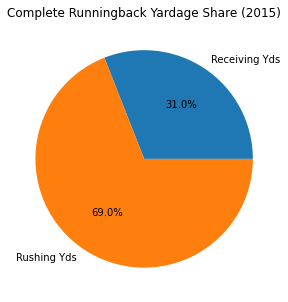

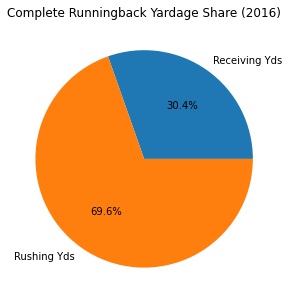

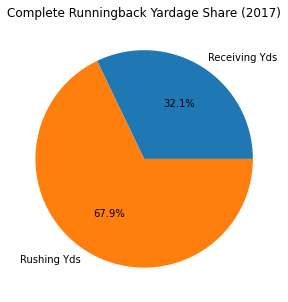

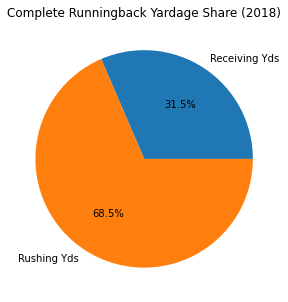

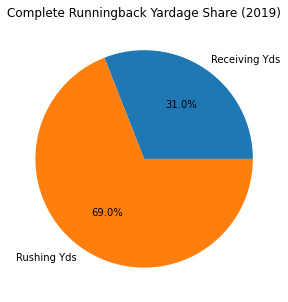

In [240]:
# Full League Split --- Rushing vs. Receiving

labels = ["Receiving Yds", "Rushing Yds"]

# 2015

whole_sum_rush_15 = skill_data_15["RushingYds"].sum()

whole_sum_rec_15 = skill_data_15["ReceivingYds"].sum()

sizes_51 = [whole_sum_rec_15,whole_sum_rush_15]

plt.figure(figsize=(5,5))

plt.pie(sizes_60,labels=labels, autopct = '%1.1f%%')

plt.title("Complete Runningback Yardage Share (2015)")

#2016

whole_sum_rush_16 = skill_data_16["RushingYds"].sum()

whole_sum_rec_16 = skill_data_16["ReceivingYds"].sum()

sizes_61 = [whole_sum_rec_16,whole_sum_rush_16]

plt.figure(figsize=(5,5))

plt.pie(sizes_61,labels=labels, autopct = '%1.1f%%')

plt.title("Complete Runningback Yardage Share (2016)")

#2017

whole_sum_rush_17 = skill_data_17["RushingYds"].sum()

whole_sum_rec_17 = skill_data_17["ReceivingYds"].sum()

sizes_71 = [whole_sum_rec_17,whole_sum_rush_17]

plt.figure(figsize=(5,5))

plt.pie(sizes_71,labels=labels, autopct = '%1.1f%%')

plt.title("Complete Runningback Yardage Share (2017)")

#2018

whole_sum_rush_18 = skill_data_18["RushingYds"].sum()

whole_sum_rec_18 = skill_data_18["ReceivingYds"].sum()

sizes_81 = [whole_sum_rec_18,whole_sum_rush_18]

plt.figure(figsize=(5,5))

plt.pie(sizes_81,labels=labels, autopct = '%1.1f%%')

plt.title("Complete Runningback Yardage Share (2018)")

#2019

whole_sum_rush_19 = skill_data_19["RushingYds"].sum()

whole_sum_rec_19 = skill_data_19["ReceivingYds"].sum()

sizes_91 = [whole_sum_rec_19,whole_sum_rush_19]

plt.figure(figsize=(5,5))

plt.pie(sizes_91,labels=labels, autopct = '%1.1f%%')

plt.title("Complete Runningback Yardage Share (2019)")

plt.show()

## Prior to our study, we predicted that the top scoring fantasy runningbacks would have more catches and receiving yards than the remainder of the runningback population.

## However, as shown above: The top scoring runningbacks actually derived a smaller share of their total yardage from receiving yards relative to the whole runningback population.

## 2015: Top 25%: 29.9% vs. Complete: 31.0%
## 2016: Top 25%: 28.0% vs. Complete: 30.4%
## 2017: Top 25%: 30.5% vs. Complete 32.1%
## 2018: Top 25%: 29.3% vs. Complete: 31.5%
## 2019: Top 25%: 28.2% vs. Complete 31.0%

If anyone else can figure out how to run a hypothesis test between the average receptions amongst the top quartile of fantasy football runningbacks, please help! Thank you : ) 

In [250]:
tq_desc_15 = top_q_scorers_15["Rec"].describe()

tq_desc_15

count    42.000000
mean     36.047619
std      17.594279
min       6.000000
25%      22.500000
50%      35.000000
75%      44.750000
max      80.000000
Name: Rec, dtype: float64

In [252]:
all_desc_15 = skill_data_15["Rec"].describe()

all_desc_15

count    165.000000
mean      15.890909
std       16.797582
min        0.000000
25%        3.000000
50%        9.000000
75%       24.000000
max       80.000000
Name: Rec, dtype: float64

In [275]:
# Import SciPy
from scipy.stats import sem

# Set up Variables for Mean Testing

# 2015 

tq_rec_15 = top_q_scorers_15["Rec"]
all_rec_15 = skill_data_15["Rec"]
tq_meanrec_15 = top_q_scorers_15["Rec"].mean()
all_meanrec_15 = skill_data_15["Rec"].mean()

# 2016

tq_rec_16 = top_q_scorers_16["Rec"]
all_rec_16 = skill_data_16["Rec"]
tq_meanrec_16 = top_q_scorers_16["Rec"].mean()
all_meanrec_16 = skill_data_16["Rec"].mean()

# 2017

tq_rec_17 = top_q_scorers_17["Rec"]
all_rec_17 = skill_data_17["Rec"]
tq_meanrec_17 = top_q_scorers_17["Rec"].mean()
all_meanrec_17 = skill_data_17["Rec"].mean()

# 2018

tq_rec_18 = top_q_scorers_18["Rec"]
all_rec_18 = skill_data_18["Rec"]
tq_meanrec_18 = top_q_scorers_18["Rec"].mean()
all_meanrec_18 = skill_data_18["Rec"].mean()

# 2019

tq_rec_19 = top_q_scorers_19["Rec"]
all_rec_19 = skill_data_19["Rec"]
tq_meanrec_19 = top_q_scorers_19["Rec"].mean()
all_meanrec_19 = skill_data_19["Rec"].mean()



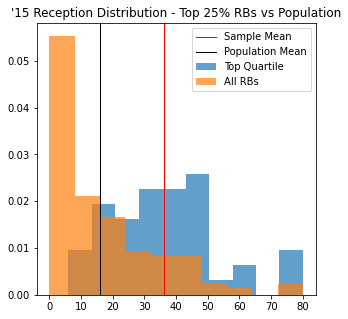

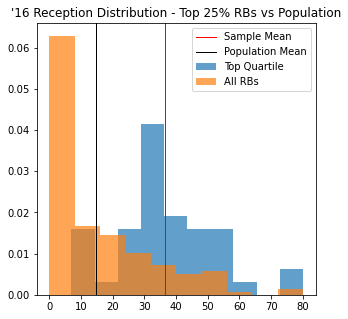

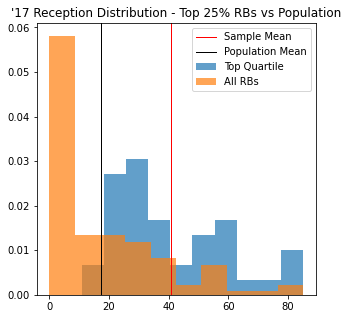

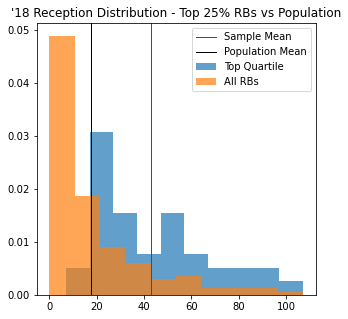

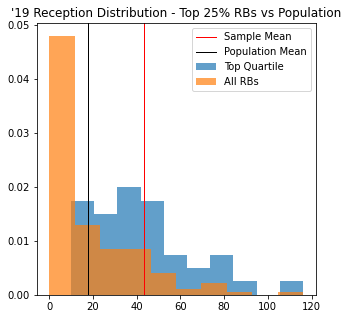

In [316]:
# Plot Histogram/Box of Fantasy Points 

# 2015

plt.figure(figsize=(5,5))
plt.title("'15 Reception Distribution - Top 25% RBs vs Population")
plt.hist(tq_rec_15, density=True, alpha=0.7, label = "Top Quartile")
plt.hist(all_rec_15, density=True, alpha=0.7, label = "All RBs")
plt.axvline(tq_meanrec_15, color='red', linewidth = 1,label="Sample Mean")
plt.axvline(all_meanrec_15, color='black',linewidth = 1, label="Population Mean")
plt.legend()

#2016

plt.figure(figsize=(5,5))
plt.title("'16 Reception Distribution - Top 25% RBs vs Population")
plt.hist(tq_rec_16, density=True, alpha=0.7, label = "Top Quartile")
plt.hist(all_rec_16, density=True, alpha=0.7, label = "All RBs")
plt.axvline(tq_meanrec_16, color='red', linewidth = 1,label="Sample Mean")
plt.axvline(all_meanrec_16, color='black',linewidth = 1, label="Population Mean")
plt.legend()

# 2017

plt.figure(figsize=(5,5))
plt.title("'17 Reception Distribution - Top 25% RBs vs Population")
plt.hist(tq_rec_17, density=True, alpha=0.7, label = "Top Quartile")
plt.hist(all_rec_17, density=True, alpha=0.7, label = "All RBs")
plt.axvline(tq_meanrec_17, color='red', linewidth = 1,label="Sample Mean")
plt.axvline(all_meanrec_17, color='black',linewidth = 1, label="Population Mean")
plt.legend()

#2018

plt.figure(figsize=(5,5))
plt.title("'18 Reception Distribution - Top 25% RBs vs Population")
plt.hist(tq_rec_18, density=True, alpha=0.7, label = "Top Quartile")
plt.hist(all_rec_18, density=True, alpha=0.7, label = "All RBs")
plt.axvline(tq_meanrec_18, color='red', linewidth = 1,label="Sample Mean")
plt.axvline(all_meanrec_18, color='black',linewidth = 1, label="Population Mean")
plt.legend()

# 2019

plt.figure(figsize=(5,5))
plt.title("'19 Reception Distribution - Top 25% RBs vs Population")
plt.hist(tq_rec_19, density=True, alpha=0.7, label = "Top Quartile")
plt.hist(all_rec_19, density=True, alpha=0.7, label = "All RBs")
plt.axvline(tq_meanrec_19, color='red', linewidth = 1,label="Sample Mean")
plt.axvline(all_meanrec_19, color='black',linewidth = 1, label="Population Mean")
plt.legend()


plt.show()